In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Problem 1: Soil Physics Calculations

#### a. Soil Volume and Bulk Density

The volume of soil can be calculated with the following formula, where the unit of volume is cubic meters ($m^3$):

$$
\text{volume\_soil} = \pi \times \text{cylinder\_radius}^2 \times \text{cylinder\_length}
$$

The bulk density of the soil, with units of kilograms per cubic meter ($kg/m^3$), is calculated as:

$$
\text{bulk\_density} = \frac{\text{mass\_soil}}{\text{volume\_soil}}
$$

#### b. Porosity

Porosity, which is a dimensionless quantity, can be calculated using:

$$
\text{porosity} = 1 - \left( \frac{\text{bulk\_density}}{\text{density\_soil\_minerals}} \right)
$$

#### c. Volumetric Soil Moisture

To calculate the volumetric soil moisture, we first determine the mass of water, volume of water, mass of minerals, and volume of minerals in the soil:

- Mass of water ($kg$):

$$
\text{mass\_water} = \text{mass\_soil} - \text{mass\_soil\_oven\_dry}
$$

- Volume of water ($m^3$):

$$
\text{volume\_water} = \frac{\text{mass\_water}}{\text{density\_water}}
$$

- Mass of minerals (equivalent to the oven-dry soil mass, $kg$):

$$
\text{mass\_minerals} = \text{mass\_soil\_oven\_dry}
$$

- Volume of minerals ($m^3$):

$$
\text{volume\_minerals} = \frac{\text{mass\_minerals}}{\text{density\_soil\_minerals}}
$$

Then, the volumetric soil moisture ($m^3/m^3$) is given by:

$$
\text{volumetric\_soil\_moisture} = \frac{\text{volume\_water}}{\text{volume\_soil}}
$$

#### d. Relative Saturation

The volume of air in the soil ($m^3$) and the relative saturation (dimensionless) are calculated as follows:

$$
\text{volume\_air} = \text{volume\_soil} - \text{volume\_water} - \text{volume\_minerals}
$$

$$
\text{relative\_saturation} = \frac{\text{volume\_water}}{\text{volume\_water} + \text{volume\_air}}


In [3]:
cylinder_length = 0.15 # m
cylinder_radius = 0.03 # m
mass_soil = 0.540 #kg
mass_soil_oven_dry = 0.420 #kg
density_water = 1000 # kg/m^3
density_soil_minerals = 2650 # kg/m^3

#a
volume_soil = np.pi * cylinder_radius**2 * cylinder_length # m^3
bulk_density = mass_soil / volume_soil # kg/m^3

#b
porosity = 1 - (bulk_density / density_soil_minerals) # unitless

#c
mass_water = mass_soil - mass_soil_oven_dry # kg
volume_water = mass_water / density_water # m^3
mass_minerals = mass_soil_oven_dry # kg
volume_minerals = mass_minerals / density_soil_minerals # m^3
volumetric_soil_moisture = volume_water / volume_soil # m^3/m^3

#d
volume_air = volume_soil - volume_water - volume_minerals # m^3
relative_saturation = volume_water / (volume_water + volume_air) # unitless

print(f"a. bulk density: {bulk_density:.2f} kg/m^3")
print(f"b. porosity: {porosity:.2f}")
print(f"c. volumetric soil moisture: {volumetric_soil_moisture:.2f} m^3/m^3")
print(f"d. relative saturation: {relative_saturation:.2f}")


a. bulk density: 1273.24 kg/m^3
b. porosity: 0.52
c. volumetric soil moisture: 0.28 m^3/m^3
d. relative saturation: 0.45


### Problem 2

========================= 2c =========================
soil moisture at field capacity for soil A: 0.40
soil moisture at field capacity for soil B: 0.49

========================= 2d =========================
soil moisture at wilting point for soil A: 0.18
soil moisture at wilting point for soil B: 0.35

========================= 2e =========================


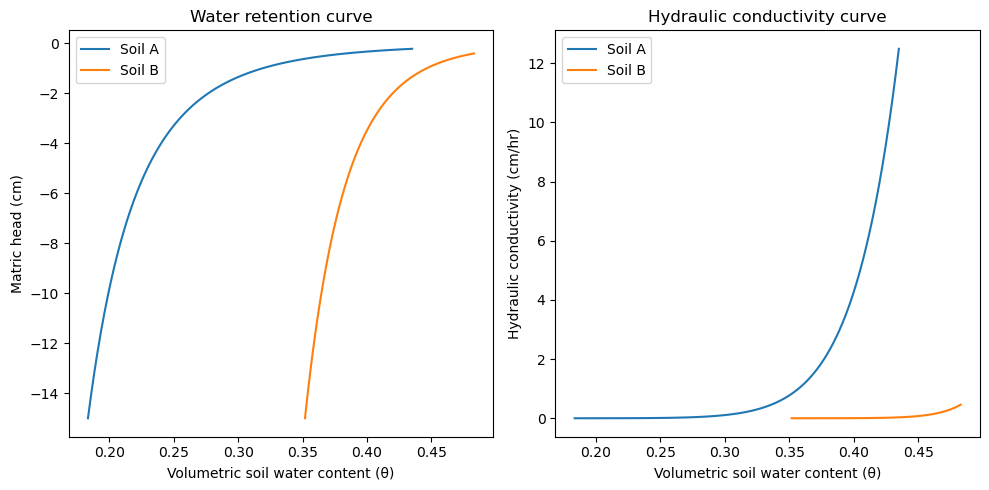

In [19]:

psi_field_capacity = -0.34 # m
psi_wilting_point = -15 # m

class Soil():
    def __init__(self, K_s, psi_s, porosity, b):

        self.K_s = K_s # saturated hydraulic conductivity (cm/hr)
        self.psi_s = psi_s # matric head at saturation (cm)
        self.porosity = porosity # porosity is equal to saturated volumetric soil moisture (unitless)
        self.theta_star = porosity # saturated soil moisture is equal to porosity (volume / volume)
        self.b = b # Brooks-Corey parameter (unitless)
        self.psi = None # matric head (cm)
        self.theta = None # volumetric soil moisture (volume / volume)

    def calc_soil_moisture(self):
        # Calculate soil moisture, theta, using the Brooks-Corey model.
        return (self.psi / self.psi_s) ** (-1 / self.b) * self.theta_star

    def calc_matric_head(self, theta):
        #Calculate matric head, psi, using the Brooks-Corey model.
        return self.psi_s * (theta / self.theta_star) ** (-self.b)

    def calc_hydraulic_conductivity(self, theta):
        # Calculate hydraulic conductivity, K,  using the Brooks-Corey model.
        c = 2 * self.b + 3
        return self.K_s * (theta / self.theta_star) ** c

soil_A = Soil(K_s = 12.49, psi_s = -0.218, porosity = 0.435, b = 4.90) # values taken from sandy loam row of Table
soil_B = Soil(K_s = 0.46, psi_s = -0.405, porosity = 0.483, b = 11.4) # values taken from clay row of Table

soil_A.psi = psi_field_capacity
soil_A.theta_field_capcity = soil_A.calc_soil_moisture()
soil_B.psi = psi_field_capacity
soil_B.theta_field_capcity = soil_B.calc_soil_moisture()

print("========================= 2c =========================")
print(f"soil moisture at field capacity for soil A: {soil_A.theta_field_capcity:.2f}")
print(f"soil moisture at field capacity for soil B: {soil_B.theta_field_capcity:.2f}")

soil_A.psi = psi_wilting_point
soil_A.theta_wilting_point = soil_A.calc_soil_moisture()
soil_B.psi = psi_wilting_point
soil_B.theta_wilting_point = soil_B.calc_soil_moisture()

print("\n========================= 2d =========================")
print(f"soil moisture at wilting point for soil A: {soil_A.theta_wilting_point:.2f}")
print(f"soil moisture at wilting point for soil B: {soil_B.theta_wilting_point:.2f}")

"""
Plot the water retention and hydraulic conductivity curves for each soil type, using the 
permanent wilting point as the minimum θ value in your plot and saturation as the maximum θ 
value in your plot.
"""

soil_A.theta_range = np.linspace(soil_A.theta_wilting_point, soil_A.theta_star, 100)
soil_A.psi_range = soil_A.calc_matric_head(soil_A.theta_range)
soil_A.K_range = soil_A.calc_hydraulic_conductivity(soil_A.theta_range)

soil_B.theta_range = np.linspace(soil_B.theta_wilting_point, soil_B.theta_star, 100)
soil_B.psi_range = soil_B.calc_matric_head(soil_B.theta_range)
soil_B.K_range = soil_B.calc_hydraulic_conductivity(soil_B.theta_range)

print("\n========================= 2e =========================")
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(soil_A.theta_range, soil_A.psi_range, label="Soil A")
ax[0].plot(soil_B.theta_range, soil_B.psi_range, label="Soil B")
ax[0].set_xlabel("Volumetric soil water content (\u03B8)")
ax[0].set_ylabel("Matric head (cm)")
ax[0].set_title("Water retention curve")
ax[0].legend()
ax[1].plot(soil_A.theta_range, soil_A.K_range, label="Soil A")
ax[1].plot(soil_B.theta_range, soil_B.K_range, label="Soil B")
ax[1].set_xlabel("Volumetric soil water content (\u03B8)")
ax[1].set_ylabel("Hydraulic conductivity (cm/hr)")
ax[1].set_title("Hydraulic conductivity curve")
ax[1].legend()
plt.tight_layout()
plt.show()



### Discussion:  
#### f. How do the field capacity and wilting point compare between the two soils?  

#### g. How do the hydraulic conductivity and matric head change as soil moisture increases? How do the hydraulic conductivity and matric head compare for the two soil types? 

#### h. How are your answers to f and g related to porosity and pore size of the two soils?  
 

## Problem 3
At a field site, a 10-hour rainstorm occurs with a constant rainfall intensity of P=20 mm/hr occurs. 
The soil at the site has the following characteristics: porosity = 0.40, b = 4, ψs = −48.5 cm; Ks = 9 mm/hr. At the beginning of the storm, the soil has a relative saturation of 55%. Use the Philip solution and the time compression approximation to answer the following questions about conditions during the storm:  

In [42]:
storm_duration = 10 # hours
P = 20 # mm/hr
porosity = 0.40 # porosity is equal to saturated volumetric soil moisture (unitless)
b = 4
psi_s = -485 # mm
K_s = 9 # mm/hr
relative_saturation = 0.55

# a. Calculate the time to ponding and the compression time

def calc_soil_sorptivity(K_s, psi_s, porosity, b, relative_saturation):
    # Calculate the soil sorptivity, S_p, in mm/hr^0.5
    theta_initial = porosity * relative_saturation
    return (K_s * (porosity - theta_initial) * np.abs(psi_s) * (2 * b + 3) / (b + 3)) ** 0.5

def calc_time_to_ponding(P, S_p, K_s):
    # Calculate the time to ponding, t_p, in hours
    return (S_p ** 2) / (2 * P * (P - K_s)) * (1 + (K_s /(2 * (P - K_s))))

def calc_compression_time(t_p, S_p, K_s, P):
    # Calculate the compression time, t_c, in hours
    return t_p - (S_p / (2 * (P - K_s)))** 2

S_p = calc_soil_sorptivity(K_s, psi_s, porosity, b, relative_saturation)
t_p = calc_time_to_ponding(P, S_p, K_s)
t_c = calc_compression_time(t_p, S_p, K_s, P)
t_r = storm_duration
print("========================= 3a =========================")
print(f"Soil sorptivity: {S_p:.2f} mm/hr^0.5")
print(f"Time to ponding: {t_p:.2f} hours")
print(f"Compression time: {t_c:.2f} hours")


# b. Calculate the cumulative infiltration from the storm. 
print("\n========================= 3b =========================")
def calc_infiltration_capacity(t, t_c, S_p, K_s):
    # Calculate the infiltration capacity, f(t), in mm/hr
    return S_p / 2 * (t - t_c)** - 0.5 + K_s

def calc_cumulative_infiltration_capacity(t, t_c, S_p, K_s):
    return S_p * (t - t_c) ** 0.5 + K_s * t

def calc_actual_cumulative_infiltration(P, t_c, t_p, S_p, K_s):
    # Calculate the actual infiltration, f(t), in mm/hr
    t_r = storm_duration
    post_ponding_infiltration = calc_cumulative_infiltration_capacity(t_r, t_c, S_p, K_s) - calc_cumulative_infiltration_capacity(t_p, t_c, S_p, K_s)
    post_ponding_infiltration = min(P * (t_r - t_p), post_ponding_infiltration)
    print(f"Post ponding infiltration: {post_ponding_infiltration:.2f} mm")
    print(f"Pre ponding infiltration: {P * t_p:.2f} mm")
    cumulative_infiltration = P * t_p + post_ponding_infiltration
    return cumulative_infiltration

cumulative_infiltration = calc_actual_cumulative_infiltration(P, t_c, t_p, S_p, K_s)
print(f"Cumulative infiltration: {cumulative_infiltration:.2f} mm")
total_precipitation = P * storm_duration
runoff = total_precipitation - cumulative_infiltration
print(f"Total precipitation: {total_precipitation:.2f} mm")

#Check if numerical integration gives the same result
from scipy.integrate import quad
# Integrate the infiltration capacity function from t_p to t_r
total_infiltration, _ = quad(calc_infiltration_capacity, t_p, t_r, args=(t_c, S_p, K_s))
print("\nNumerical integration gives the same result as the analytical solution:")
print(f"Post ponding infiltration: {total_infiltration:.2f} mm")

print("\n========================= 3c =========================")
print(f"Precip post ponding: {P * (t_r - t_p):.2f} mm")
print(f"runoff: {runoff:.2f} mm")




========================= 3a =========================
Soil sorptivity: 35.14 mm/hr^0.5
Time to ponding: 3.95 hours
Compression time: 1.40 hours

========================= 3b =========================
Post ponding infiltration: 101.32 mm
Pre ponding infiltration: 79.08 mm
Cumulative infiltration: 180.40 mm
Total precipitation: 200.00 mm

Numerical integration gives the same result as the analytical solution:
Post ponding infiltration: 101.32 mm

========================= 3c =========================
Precip post ponding: 120.92 mm
runoff: 19.60 mm


In [56]:
import numpy as np
from scipy.integrate import quad

class Infiltration:
    def __init__(self, storm_duration, P, porosity, b, psi_s, K_s, relative_saturation):
        self.storm_duration = storm_duration
        self.P = P
        self.porosity = porosity
        self.b = b
        self.psi_s = psi_s
        self.K_s = K_s
        self.relative_saturation = relative_saturation
        self.S_p = self.calc_soil_sorptivity()
        self.t_p = self.calc_time_to_ponding()
        self.t_c = self.calc_compression_time()
        self.t_r = self.storm_duration

    def calc_soil_sorptivity(self):
        theta_initial = self.porosity * self.relative_saturation
        return (self.K_s * (self.porosity - theta_initial) * np.abs(self.psi_s) * (2 * self.b + 3) / (self.b + 3)) ** 0.5

    def calc_time_to_ponding(self):
        return (self.S_p ** 2) / (2 * self.P * (self.P - self.K_s)) * (1 + (self.K_s /(2 * (self.P - self.K_s))))

    def calc_compression_time(self):
        return self.t_p - (self.S_p / (2 * (self.P - self.K_s)))** 2

    def calc_infiltration_capacity(self, t):
        return self.S_p / 2 * (t - self.t_c)** - 0.5 + self.K_s

    def calc_cumulative_infiltration_capacity(self, t):
        return self.S_p * (t - self.t_c) ** 0.5 + self.K_s * t

    def calc_actual_cumulative_infiltration(self):
        post_ponding_infiltration = self.calc_cumulative_infiltration_capacity(self.t_r) - self.calc_cumulative_infiltration_capacity(self.t_p)
        post_ponding_infiltration = min(self.P * (self.t_r - self.t_p), post_ponding_infiltration)
        cumulative_infiltration = self.P * self.t_p + post_ponding_infiltration
        return cumulative_infiltration

    def calculate(self):
        cumulative_infiltration = self.calc_actual_cumulative_infiltration()
        total_precipitation = self.P * self.storm_duration
        runoff = total_precipitation - cumulative_infiltration

        print(f"Soil sorptivity: {self.S_p:.2f} mm/hr^0.5")
        if self.P > self.K_s:
            print(f"Time to ponding: {self.t_p:.2f} hours")
            print(f"Compression time: {self.t_c:.2f} hours")
        else:
            print("P < K_s, no ponding occurs")
        print(f"Cumulative infiltration: {cumulative_infiltration:.2f} mm")
        print(f"Total precipitation: {total_precipitation:.2f} mm")
        print(f"Runoff: {runoff:.2f} mm")

    def calculate_numerically(self):
        post_ponding_infiltration, _ = quad(self.calc_infiltration_capacity, self.t_p, self.t_r)
        total_infiltration = self.P * self.t_p + post_ponding_infiltration
        print(f"Cumulative infiltration (Numerical integration): {total_infiltration:.2f} mm")
#=====================Parameters========================#
storm_duration = 10 # hours
P = 20 # mm/hr
porosity = 0.40 # porosity is equal to saturated volumetric soil moisture (unitless)
b = 4
psi_s = -485 # mm
K_s = 9 # mm/hr
relative_saturation = 0.55
#d. Repeat the calculations in a-c) but for two different initial conditions: 20% relative saturation and 90% relative saturation.

 

print("\n========================= 3a - 3c: 55% relative saturation =========================")
infiltration = Infiltration(storm_duration, P, porosity, b, psi_s, K_s, relative_saturation)
infiltration.calculate()
print("\nCheck if numerical integration gives the same result:")
infiltration.calculate_numerically()

print("\n========================= 3d.1: 20% relative saturation =========================")
relative_saturation_20 = 0.20
infiltration_20RS = Infiltration(storm_duration, P, porosity, b, psi_s, K_s, relative_saturation_20)
infiltration_20RS.calculate()
print("\n========================= 3d.2: 90% relative saturation =========================")
relative_saturation_90 = 0.90 
infiltration_90RS = Infiltration(storm_duration, P, porosity, b, psi_s, K_s, relative_saturation_90)
infiltration_90RS.calculate()

#e. Repeat the calculations in a-c) using the original 55% relative saturation but for two different storms: a 12.5-hour storm with a rain rate of 16 mm/hr and an 8-hour storm with a rain rate of 25 mm/hr. 
print("\n========================= 3e.1: 12.5-hour storm with a rain rate of 16 mm/hr =========================")
storm_duration = 12.5 # hours
P = 16 # mm/hr 
infiltration_16P = Infiltration(storm_duration, P, porosity, b, psi_s, K_s, relative_saturation)
infiltration_16P.calculate()
print("\n========================= 3e.2: 8-hour storm with a rain rate of 25 mm/hr =========================")
storm_duration = 8 # hours
P = 25 # mm/hr
infiltration_25P = Infiltration(storm_duration, P, porosity, b, psi_s, K_s, relative_saturation)
infiltration_25P.calculate()

#f. Calculate the values in a-c) for a 10-hour storm with a 5 mm/hr rain rate. (Note that you will need to use a different calculation method for this storm). 
print("\n========================= 3f: 10-hour storm with a 5 mm/hr rain rate =========================")
storm_duration = 10 # hours
P = 5 # mm/hr
infiltration_5P = Infiltration(storm_duration, P, porosity, b, psi_s, K_s, relative_saturation)
infiltration_5P.calculate() 


========================= 3a - 3c: 55% relative saturation =========================
Soil sorptivity: 35.14 mm/hr^0.5
Time to ponding: 3.95 hours
Compression time: 1.40 hours
Cumulative infiltration: 180.40 mm
Total precipitation: 200.00 mm
Runoff: 19.60 mm

Check if numerical integration gives the same result:
Cumulative infiltration (Numerical integration): 180.40 mm

========================= 3d.1: 20% relative saturation =========================
Soil sorptivity: 46.85 mm/hr^0.5
Time to ponding: 7.03 hours
Compression time: 2.49 hours
Cumulative infiltration: 195.91 mm
Total precipitation: 200.00 mm
Runoff: 4.09 mm

========================= 3d.2: 90% relative saturation =========================
Soil sorptivity: 16.56 mm/hr^0.5
Time to ponding: 0.88 hours
Compression time: 0.31 hours
Cumulative infiltration: 138.75 mm
Total precipitation: 200.00 mm
Runoff: 61.25 mm

========================= 3e.1: 12.5-hour storm with a rain rate of 16 mm/hr =========================
Soil sorptiv

### Discussion:  
#### g. Based on your answers in d-f) and your understanding of the infiltration process, discuss how the water input rate (i.e. storm intensity) and initial soil moisture conditions qualitatively affect cumulative infiltration.  

#### h. Discuss at least three soil surface conditions or factors that could affect infiltration capacity (other than the soil mineral properties). Would each of these conditions tend to increase or decrease infiltration?  
 